In [10]:
from Entities.database.Skill import get_skill_aggregate_hiscore

activity = 'Fletching'
df, formatter = get_skill_aggregate_hiscore(activity)
df.describe(include='bool')

,Banned
count,500
unique,2
top,False
freq,425


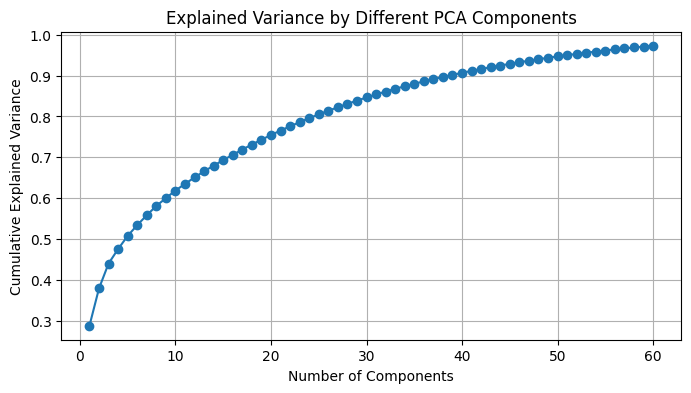

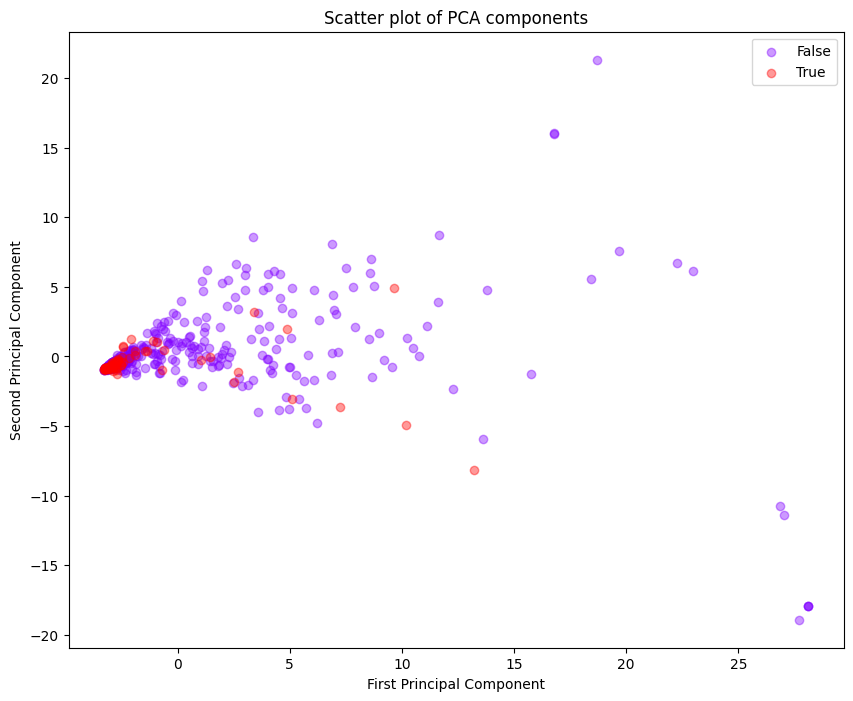

In [8]:
from Entities.features.Pca import Pca

# PCA
pca = Pca(df=df, 
          skills=formatter.get_skill_names(),
          #minigames=None,
          minigames = formatter.get_minigame_names(), 
          n_components=60)
pca.run()
pca.elbow_plot()
pca.plot()

In [9]:
from Entities.Models.RF import rf_model
from Entities.helpers.sampling import undersample

df = undersample(df)

banned_count = len(df[df['Banned'] == True])
unbanned_count = len(df[df['Banned'] == False])

class_weights = {0: unbanned_count, 1: banned_count}

rf_model(pca.X_r, pca.y, class_weights, threshold=0.3)

Undersampling complete: 500 into 150 rows.
Class size: 75
Weights: {0: 75, 1: 75}
Accuracy: 0.87
Confusion Matrix:
 [[87  2]
 [11  0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.93        89
        True       0.00      0.00      0.00        11

    accuracy                           0.87       100
   macro avg       0.44      0.49      0.47       100
weighted avg       0.79      0.87      0.83       100

ROC-AUC Score: 0.47
